In [48]:
%time
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

CPU times: total: 0 ns
Wall time: 0 ns


In [49]:
MIN_MATCH_COUNT = 10

In [50]:
img1 = cv2.imread('3.jpg', 0)   # queryImage
img2 = cv2.imread('4.jpg', 0)      # trainImage

In [51]:
sift = cv2.SIFT_create()
akaze = cv2.AKAZE_create()                                
surf = cv2.xfeatures2d_SURF.create(hessianThreshold=800)
orb = cv2.ORB_create(50)

In [52]:
%time
# Compute SIFT keypoints and descriptors
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# Compute SURF keypoints and descriptors
kp3, des3 = surf.detectAndCompute(img1,None)
kp4, des4 = surf.detectAndCompute(img2,None)

# Compute AKAZE keypoints and descriptors
kp5, des5 = akaze.detectAndCompute(img1,None)
kp6, des6 = akaze.detectAndCompute(img2,None)

# Compute ORB keypoints and descriptors
kp7, des7 = orb.detectAndCompute(img1,None)
kp8, des8 = orb.detectAndCompute(img2,None)


CPU times: total: 0 ns
Wall time: 0 ns


In [53]:
%time
# Initialize and use FLANN
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

CPU times: total: 0 ns
Wall time: 0 ns


In [54]:
%time
matches0 = flann.knnMatch(des1, des2, k=2)

CPU times: total: 0 ns
Wall time: 0 ns


In [55]:
%time
matches1 = flann.knnMatch(des3, des4, k=2)

CPU times: total: 0 ns
Wall time: 0 ns


In [56]:
%time
descriptors5 = np.float32(des5)
descriptors6 = np.float32(des6)
matches2 = flann.knnMatch(descriptors5, descriptors6, k=2)

CPU times: total: 0 ns
Wall time: 0 ns


In [57]:
%time
descriptors7 = np.float32(des7)
descriptors8 = np.float32(des8)
matches3 = flann.knnMatch(descriptors7, descriptors8, k=2)

CPU times: total: 0 ns
Wall time: 0 ns


In [58]:
# Lowe's ratio test
good0 = []
good1 = []
good2 = []
good3 = []

for m, n in matches0:
    if m.distance < 0.7 * n.distance:
        good0.append(m)
        
for m, n in matches1:
    if m.distance < 0.7 * n.distance:
        good1.append(m)

for m, n in matches2:
    if m.distance < 0.7 * n.distance:
        good2.append(m)

for m, n in matches3:
    if m.distance < 0.7 * n.distance:
        good3.append(m)

CPU times: total: 0 ns
Wall time: 0 ns


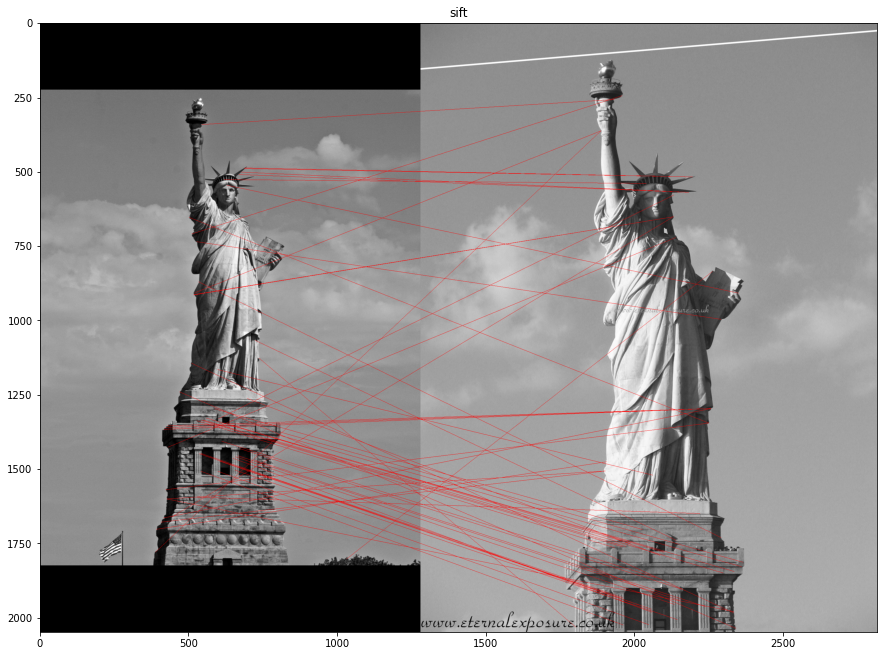

In [59]:
%time
if len(good0) > MIN_MATCH_COUNT:
    # Estimate homography between template and scene
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good0]).reshape(-1, 1, 2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good0]).reshape(-1, 1, 2)

    M = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)[0]

    # Draw detected template in scene image
    h, w = img1.shape
    pts = np.float32([[0, 0],
                      [0, h - 1],
                      [w - 1, h - 1],
                      [w - 1, 0]]).reshape(-1, 1, 2)
    dst = cv2.perspectiveTransform(pts, M)

    img2 = cv2.polylines(img2, [np.int32(dst)], True, 255, 3, cv2.LINE_AA)

    h1, w1 = img1.shape
    h2, w2 = img2.shape
    nWidth = w1 + w2
    nHeight = max(h1, h2)
    hdif = int((h2 - h1) / 2)
    newimg = np.zeros((nHeight, nWidth, 3), np.uint8)

    for i in range(3):
        newimg[hdif:hdif + h1, :w1, i] = img1
        newimg[:h2, w1:w1 + w2, i] = img2

    # Draw SIFT keypoint matches
    for m in good0:
        pt1 = (int(kp1[m.queryIdx].pt[0]), int(kp1[m.queryIdx].pt[1] + hdif))
        pt2 = (int(kp2[m.trainIdx].pt[0] + w1), int(kp2[m.trainIdx].pt[1]))
        cv2.line(newimg, pt1, pt2, (255, 0, 0))
    
    fig = plt.figure(figsize = (15,15))
    ax = fig.add_subplot(111)
    ax.imshow(newimg)
    ax.set_title('sift')
    #plt.show()
else:
    print("SIFT Not enough matches are found - %d/%d" % (len(good0), MIN_MATCH_COUNT))

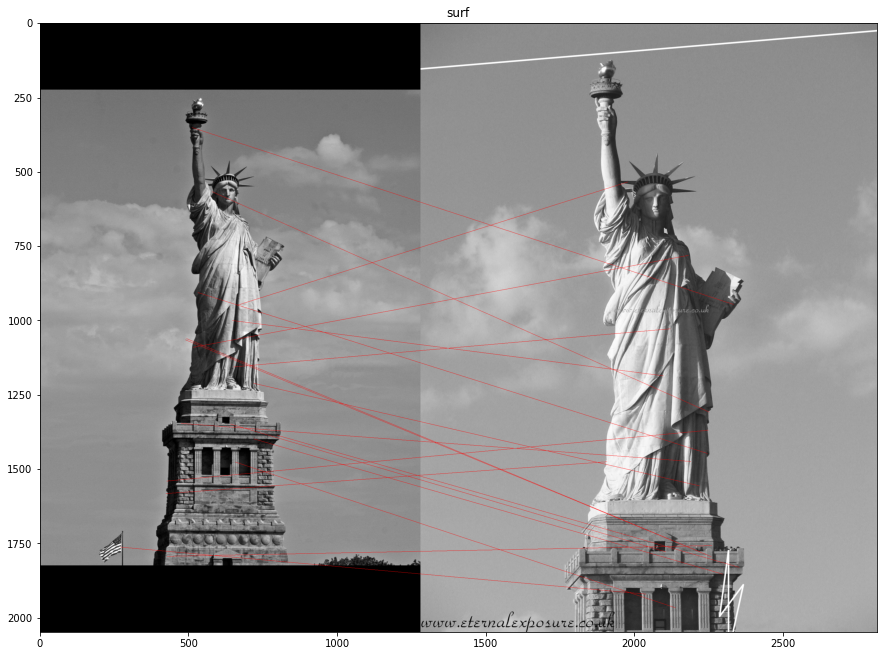

In [60]:
if len(good1) > MIN_MATCH_COUNT:
    # Estimate homography between template and scene
    src_pts = np.float32([ kp3[m.queryIdx].pt for m in good1]).reshape(-1, 1, 2)
    dst_pts = np.float32([ kp4[m.trainIdx].pt for m in good1]).reshape(-1, 1, 2)

    M = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)[0]

    # Draw detected template in scene image
    h, w = img1.shape
    pts = np.float32([[0, 0],
                      [0, h - 1],
                      [w - 1, h - 1],
                      [w - 1, 0]]).reshape(-1, 1, 2)
    dst = cv2.perspectiveTransform(pts, M)

    img2 = cv2.polylines(img2, [np.int32(dst)], True, 255, 3, cv2.LINE_AA)

    h1, w1 = img1.shape
    h2, w2 = img2.shape
    nWidth = w1 + w2
    nHeight = max(h1, h2)
    hdif = int((h2 - h1) / 2)
    newimg = np.zeros((nHeight, nWidth, 3), np.uint8)

    for i in range(3):
        newimg[hdif:hdif + h1, :w1, i] = img1
        newimg[:h2, w1:w1 + w2, i] = img2

    # Draw SIFT keypoint matches
    for m in good1:
        pt1 = (int(kp3[m.queryIdx].pt[0]), int(kp3[m.queryIdx].pt[1] + hdif))
        pt2 = (int(kp4[m.trainIdx].pt[0] + w1), int(kp4[m.trainIdx].pt[1]))
        cv2.line(newimg, pt1, pt2, (255, 0, 0))
    
    fig = plt.figure(figsize = (15,15))
    ax = fig.add_subplot(111)
    ax.imshow(newimg)
    ax.set_title('surf')
    #plt.show()
else:
    print("SURF Not enough matches are found - %d/%d" % (len(good1), MIN_MATCH_COUNT))

In [61]:
if len(good2) > MIN_MATCH_COUNT:
    # Estimate homography between template and scene
    src_pts = np.float32([ kp5[m.queryIdx].pt for m in good2]).reshape(-1, 1, 2)
    dst_pts = np.float32([ kp6[m.trainIdx].pt for m in good2]).reshape(-1, 1, 2)

    M = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)[0]

    # Draw detected template in scene image
    h, w = img1.shape
    pts = np.float32([[0, 0],
                      [0, h - 1],
                      [w - 1, h - 1],
                      [w - 1, 0]]).reshape(-1, 1, 2)
    dst = cv2.perspectiveTransform(pts, M)

    img2 = cv2.polylines(img2, [np.int32(dst)], True, 255, 3, cv2.LINE_AA)

    h1, w1 = img1.shape
    h2, w2 = img2.shape
    nWidth = w1 + w2
    nHeight = max(h1, h2)
    hdif = int((h2 - h1) / 2)
    newimg = np.zeros((nHeight, nWidth, 3), np.uint8)

    for i in range(3):
        newimg[hdif:hdif + h1, :w1, i] = img1
        newimg[:h2, w1:w1 + w2, i] = img2

    # Draw SIFT keypoint matches
    for m in good2:
        pt1 = (int(kp5[m.queryIdx].pt[0]), int(kp5[m.queryIdx].pt[1] + hdif))
        pt2 = (int(kp6[m.trainIdx].pt[0] + w1), int(kp6[m.trainIdx].pt[1]))
        cv2.line(newimg, pt1, pt2, (255, 0, 0))
    
    fig = plt.figure(figsize = (15,15))
    ax = fig.add_subplot(111)
    ax.imshow(newimg)
    ax.set_title('akaze')
    #plt.show()
else:
    print("AKAZE Not enough matches are found - %d/%d" % (len(good2), MIN_MATCH_COUNT))

AKAZE Not enough matches are found - 4/10


In [62]:
if len(good3) > MIN_MATCH_COUNT:
    # Estimate homography between template and scene
    src_pts = np.float32([ kp7[m.queryIdx].pt for m in good3]).reshape(-1, 1, 2)
    dst_pts = np.float32([ kp8[m.trainIdx].pt for m in good3]).reshape(-1, 1, 2)

    M = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)[0]

    # Draw detected template in scene image
    h, w = img1.shape
    pts = np.float32([[0, 0],
                      [0, h - 1],
                      [w - 1, h - 1],
                      [w - 1, 0]]).reshape(-1, 1, 2)
    dst = cv2.perspectiveTransform(pts, M)

    img2 = cv2.polylines(img2, [np.int32(dst)], True, 255, 3, cv2.LINE_AA)

    h1, w1 = img1.shape
    h2, w2 = img2.shape
    nWidth = w1 + w2
    nHeight = max(h1, h2)
    hdif = int((h2 - h1) / 2)
    newimg = np.zeros((nHeight, nWidth, 3), np.uint8)

    for i in range(3):
        newimg[hdif:hdif + h1, :w1, i] = img1
        newimg[:h2, w1:w1 + w2, i] = img2

    # Draw SIFT keypoint matches
    for m in good3:
        pt1 = (int(kp7[m.queryIdx].pt[0]), int(kp7[m.queryIdx].pt[1] + hdif))
        pt2 = (int(kp8[m.trainIdx].pt[0] + w1), int(kp8[m.trainIdx].pt[1]))
        cv2.line(newimg, pt1, pt2, (255, 0, 0))
    
    fig = plt.figure(figsize = (15,15))
    ax = fig.add_subplot(111)
    ax.imshow(newimg)
    ax.set_title('orb')
    #plt.show()
else:
    print("ORB Not enough matches are found - %d/%d" % (len(good3), MIN_MATCH_COUNT))

ORB Not enough matches are found - 0/10


In [33]:
print("SIFT Good matches are found - %d/%d" % (len(good0), MIN_MATCH_COUNT))
print("SURF Good matches are found - %d/%d" % (len(good1), MIN_MATCH_COUNT))
print("AKAZE Good matches are found - %d/%d" % (len(good2), MIN_MATCH_COUNT))
print("ORB Not Good matches are found - %d/%d" % (len(good3), MIN_MATCH_COUNT))

SIFT Good matches are found - 18047/10
SURF Good matches are found - 6690/10
AKAZE Good matches are found - 994/10
ORB Not Good matches are found - 2/10
